# Jonathan Halverson
# Wednesday, May 4, 2016
# Boston crime data analysis

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

### Field Name, Data Type, Required Description
* [COMPNOS] [int] NOT NULL,       Internal BPD report number
* [REPORTINGAREA] [nvarchar](20) NULL,    RA number associated with the where the crime was reported from.
* [INCIDENT_TYPE_DESCRIPTION] [nvarchar](200) NULL,       BPD incident classification
* [REPTDISTRICT] [nvarchar](100) NULL,    What district the crime was reported in
* [FROMDATE] [datetime2](7) NULL, Earliest date and time the incident could have taken place
* [TODATE] [datetime2](7) NULL,   Latest date and time the incident could have taken place
* [STREETNAME] [nvarchar](100) NULL,      Street name the incident took place
* [XSTREETNAME] [nvarchar](100) NULL,     optional - Cross street the incident took place
* [WEAPONTYPE] [nvarchar](100) NULL,      Detailed info on the weapon type (free form field)
* [BUILDINGTYPE] [nvarchar](100) NULL,    Info on where the incident took place (street, Hospital, Convenience Store)
* [PLACEOFENTRY] [nvarchar](100) NULL,    Point of entry.  Only relevant with specific incident types
* [PERPETRATORSNOS] [smallint] NULL,      Total number of suspects involved
* [SUSPECTTRANSPORTATION] [nvarchar](100) NULL,   Vehicle info (if known) of the suspects involved
* [VICTIMACTIVITY] [nvarchar](300) NULL,  What the victim was doing at the time of incident ("Walking", "Driving", etc)
* [UNUSUALACTIONS] [nvarchar](300) NULL,  optional - but will typically include an expression or something a suspect said while committing the crime or something different that they did during the crime
* [WEATHER] [nvarchar](100) NULL, Weather related info at the time of the incident
* [NEIGHBORHOOD] [nvarchar](100) NULL,    Boston Police Defined Neighborhood the incident took place
* [LIGHTING] [nvarchar](100) NULL,        Visibility info at the time of the incident
* [CLEARANCESTATUSDESC] [nvarchar](100) NULL,     An incident is cleared when either the suspect is arrested or the case is tabled due to it being exceptionally cleared (no who it is but victim chooses not to press charges
* [MAIN_CRIMECODE] [nvarchar](15) NULL,   BRIC classification of the crime code for analysis purposes
* [ROBBERY_TYPE] [nvarchar](25) NULL,     "Street", "Commercial", "Bank", "Other".  Only relevant if the incident is a Robbery (03xx Main_Crimecode)
* [ROBBERY_ATTEMP] [nvarchar](10) NULL,   Was the robbery an attempt only
* [BURGLARY_TIME] [nvarchar](10) NULL,    "Night", "Day".  Only relevant if the incident is either commercial burglary (05CB) or residential burglary (05RB)
* [DOMESTIC] [nvarchar](10) NULL, Was the suspect a family member or intimate partner of the victim
* [WEAPON_TYPE] [nvarchar](100) NULL,     BRIC classification of weapon type ("Gun", "Knife", "Other", "Unarmed")
* [SHIFT] [nvarchar](50) NULL,    What shift (Day, First, Last) the incident took place on
* [DAY_WEEK] [nvarchar](50) NULL, What day of the week the incident took place
* [UCRPART] [nvarchar](20) NULL,  Universal Crime Reporting Part number (1,2, 3)
* [X] [numeric](38, 8) NULL,      X coordinate (state plane, feet) of the geocoded address location (obscured to the street segment centroid for privacy).
* [Y] [numeric](38, 8) NULL,      Y coordinate (state plane, feet) of the geocoded address location(obscured to the street segment centroid for privacy).
* [GREPORTING] [varchar](50) NULL,        Reporting area of the geocoded location of the Incident
* [GSECTOR] [varchar](50) NULL,   Sector of the geocoded location of the Incident
* [GBEAT] [varchar](40) NULL,     Beat of the gecoded location of the incident
* [GDISTRICT] [varchar](10) NULL, District of the geocoded location of the Incident
* [GDISTRICT_PRE2009] [varchar](10) NULL, District pre 2009 of the gecoded location of the Incident
* [COMPUTEDCRIMECODE] [nvarchar](20) NULL,        Crime code determined by looking at all of the supplements involved in the incident and determining the lowest crime code.  The lower the crimecode the more serious the crime
* [COMPUTEDCRIMECODEDESC] [nvarchar](255) NULL,   Textual description of the above crime code

In [226]:
df = pd.read_csv('/Users/jhalverson/Downloads/Crime_Incident_Reports.csv')
df.head().transpose()

,0,1,2,3,4
COMPNOS,1.2042e+08,1.20419e+08,1.20419e+08,1.20419e+08,1.20419e+08
NatureCode,BERPTA,PSHOT,ARMROB,ALARMC,ARMROB
INCIDENT_TYPE_DESCRIPTION,RESIDENTIAL BURGLARY,AGGRAVATED ASSAULT,ROBBERY,COMMERCIAL BURGLARY,ROBBERY
MAIN_CRIMECODE,05RB,04xx,03xx,05CB,03xx
REPTDISTRICT,D4,B2,D4,B2,E18
REPORTINGAREA,629,327,625,258,496
FROMDATE,07/08/2012 06:00:00 AM,07/08/2012 06:03:00 AM,07/08/2012 06:26:00 AM,07/08/2012 06:56:00 AM,07/08/2012 07:15:00 AM
WEAPONTYPE,Other,Firearm,Firearm,Other,Firearm
Shooting,No,Yes,No,No,No
DOMESTIC,No,No,No,No,No


Format the FROMDATE field to a NumPy datetime64:

In [227]:
df['FROMDATE'] = pd.to_datetime(df['FROMDATE'], infer_datetime_format=True)

In [228]:
df.dtypes

COMPNOS                             float64
NatureCode                           object
INCIDENT_TYPE_DESCRIPTION            object
MAIN_CRIMECODE                       object
REPTDISTRICT                         object
REPORTINGAREA                         int64
FROMDATE                     datetime64[ns]
WEAPONTYPE                           object
Shooting                             object
DOMESTIC                             object
SHIFT                                object
Year                                  int64
Month                                 int64
DAY_WEEK                             object
UCRPART                              object
X                                   float64
Y                                   float64
STREETNAME                           object
XSTREETNAME                          object
Location                             object
dtype: object

Check for null values:

In [229]:
df.isnull().sum()

COMPNOS                       12259
NatureCode                     1665
INCIDENT_TYPE_DESCRIPTION         0
MAIN_CRIMECODE                    0
REPTDISTRICT                    357
REPORTINGAREA                     0
FROMDATE                          0
WEAPONTYPE                        0
Shooting                          0
DOMESTIC                          0
SHIFT                         12265
Year                              0
Month                             0
DAY_WEEK                          0
UCRPART                           0
X                             14981
Y                             14981
STREETNAME                      234
XSTREETNAME                  219374
Location                          0
dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268056 entries, 0 to 268055
Data columns (total 20 columns):
COMPNOS                      255797 non-null float64
NatureCode                   266391 non-null object
INCIDENT_TYPE_DESCRIPTION    268056 non-null object
MAIN_CRIMECODE               268056 non-null object
REPTDISTRICT                 267699 non-null object
REPORTINGAREA                268056 non-null int64
FROMDATE                     268056 non-null datetime64[ns]
WEAPONTYPE                   268056 non-null object
Shooting                     268056 non-null object
DOMESTIC                     268056 non-null object
SHIFT                        255791 non-null object
Year                         268056 non-null int64
Month                        268056 non-null int64
DAY_WEEK                     268056 non-null object
UCRPART                      268056 non-null object
X                            253075 non-null float64
Y                            253075 non-null float

Below we print out the different types of crimes and their count:

In [247]:
incident_type = pd.crosstab(index=df["INCIDENT_TYPE_DESCRIPTION"], columns="count")
incident_type.columns = ["Count"]
incident_type.index = map(lambda x: x.title(), incident_type.index)
pd.options.display.max_rows = df["INCIDENT_TYPE_DESCRIPTION"].shape[0]
incident_type.sort_values('Count', ascending=False)

,Count
Val,27363
Other Larceny,24443
Simple Assault,17697
Medassist,17128
Mvacc,13832
Vandalism,13339
Invper,12937
Larceny From Motor Vehicle,12742
Drug Charges,12042
Fraud,8742


In [249]:
pd.reset_option('max_rows')

# Part 1: Shooting crimes

In [233]:
by_day = pd.crosstab(index=df["DAY_WEEK"], columns="count")
by_day.columns = ["Count"]
by_day

,Count
DAY_WEEK,
Friday,42031
Monday,38256
Saturday,38446
Sunday,34393
Thursday,38627
Tuesday,37911
Wednesday,38392


In [234]:
day_shoot = pd.crosstab(index=df["DAY_WEEK"], columns=df["Shooting"], margins=True)
day_shoot

Shooting,No,Yes,All
DAY_WEEK,,,
Friday,41928,103,42031
Monday,38171,85,38256
Saturday,38332,114,38446
Sunday,34260,133,34393
Thursday,38536,91,38627
Tuesday,37827,84,37911
Wednesday,38305,87,38392
All,267359,697,268056


### Pandas display options

In [250]:
print pd.options.display.max_rows
print pd.options.display.max_columns

60
20


In [252]:
pd.options.display.max_columns = 30
#pd.set_option('expand_frame_repr', True)

Number of shooting and non-shooting crimes by day of the week and month:

In [253]:
day_shoot_month = pd.crosstab(index=df["DAY_WEEK"], columns=[df["Shooting"], df["Month"]], margins=True)
day_shoot_month

Shooting      No                                                          \
Month          1      2      3      4      5      6      7      8      9   
DAY_WEEK                                                                   
Friday      3444   2939   3223   2986   4165   3175   4231   4313   3446   
Monday      2740   2568   3192   3251   2989   3373   4332   3240   3448   
Saturday    2749   2744   3199   2774   3325   3236   3586   3888   3486   
Sunday      2258   2350   3071   2439   2837   3163   3540   3332   3311   
Thursday    3569   2703   2797   3039   3595   3017   4285   3774   3003   
Tuesday     2867   2535   2951   3205   3045   3060   4503   3277   3277   
Wednesday   3021   2601   2826   3172   3281   3043   4517   3613   3124   
All        20648  18440  21259  20866  23237  22067  28994  25437  23095   

Shooting                       Yes                                           \
Month         10     11     12   1   2   3   4   5   6    7   8   9  10  11   
DAY_WEEK                                                                      
Friday      3523   3543   2940  11   4   7  11   9   9   12  11   5   7   8   
Monday      3094   2651   3293   9   0   3  13   4   7   19   6   6   9   5   
Saturday    3071   3307   2967   2   3  11   5   7  21   18  14  14   4   7   
Sunday      2537   2711   2711   6   6   5   5  13  12   29  28  16   3   6   
Thursday    3461   2737   2556  11   3   4   9  11   4   17   9   7   8   2   
Tuesday     3484   2678   2945   5   2   4  12   9   4   13   9   8   7   6   
Wednesday   3617   2710   2780   5   3   2   9   4   8   11  11   8  11   8   
All        22787  20337  20192  49  21  36  64  57  65  119  88  64  49  42   

Shooting          All  
Month      12          
DAY_WEEK               
Friday      9   42031  
Monday      4   38256  
Saturday    8   38446  
Sunday      4   34393  
Thursday    6   38627  
Tuesday     5   37911  
Wednesday   7   38392  
All        43  268056

In [254]:
pd.reset_option('max_columns')
#pd.reset_option('expand_frame_repr')

In [273]:
day_shoot = df[df['Shooting'] == 'Yes']
day_shoot_tab = pd.crosstab(index=day_shoot['FROMDATE'].apply(lambda x: x.hour), columns='Count')

Number of shootings each hour of the day (combined over all days of the week):

(0, 24)

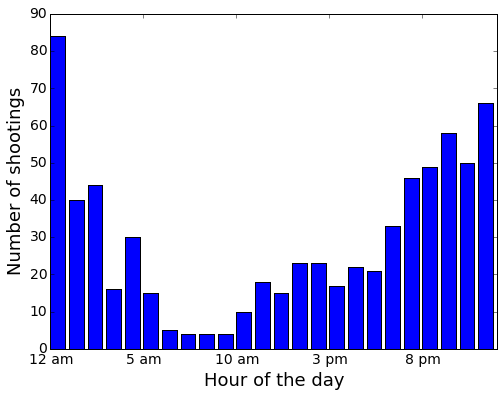

In [263]:
plt.bar(day_shoot_tab.index, day_shoot_tab['Count'])
plt.xlabel('Hour of the day')
plt.ylabel('Number of shootings')
plt.xticks([0, 5, 10, 15, 20], ['12 am', '5 am', '10 am', '3 pm', '8 pm'])
plt.xlim(0, 24)

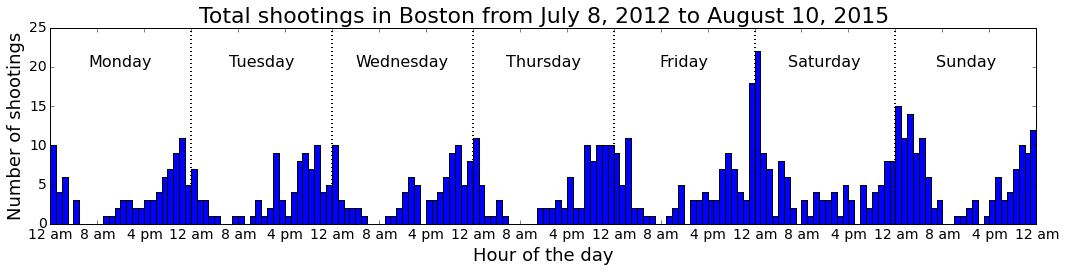

In [275]:
plt.fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
shootings = []
hours = []
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days):
    df_day = df[df.DAY_WEEK == day]
    day_shoot = pd.crosstab(index=df_day['FROMDATE'].apply(lambda x: x.hour), columns=df_day["Shooting"])
    shootings.extend(list(day_shoot.iloc[:,1].values))
    hours.extend(list(day_shoot.index + i * 24))
ax.bar(hours, shootings, width=1.0)
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Number of shootings')
ax.set_xlim(0, 168)
ax.set_ylim(0, 25)
for i, day in enumerate(days):
    plt.text(x=i * 24 + 12, y=20, s=day, transform=ax.transData, size=16, horizontalalignment='center')
for x in range(24, 168, 24):
    plt.axvline(x, ymin=0, ymax=25, linewidth=2, color='k', ls=':')
plt.xticks(range(0, 168 + 8, 8))
ax.set_xticklabels(7 * ['12 am', '8 am', '4 pm'] + ['12 am'])
plt.title('Total shootings in Boston from July 8, 2012 to August 10, 2015')
plt.tight_layout()
plt.savefig('shooting_by_day_by_hour.png')

In [ ]:
#Statistical significance versus weekdays

### 2014 Only

In [266]:
df2014 = df[(df.FROMDATE > np.datetime64('2014-01-01')) & (df.FROMDATE < np.datetime64('2015-01-01'))]

In [267]:
df2014.iloc[0].FROMDATE

Timestamp('2014-01-01 03:01:00')

In [268]:
df2014.iloc[-1].FROMDATE

Timestamp('2014-12-31 23:59:00')

# Part II: Weapon type

### When weapons were used in the crime, what was the distribution?

In [305]:
by_weapon = pd.crosstab(index=df[(df["WEAPONTYPE"] != 'None') &
                                 (df["WEAPONTYPE"] != 'Unarmed') &
                                 (df["WEAPONTYPE"] != 'Other')]["WEAPONTYPE"], columns="count")
by_weapon.columns = ["Count"]
by_weapon

,Count
WEAPONTYPE,
Blunt Object,78
Firearm,5299
Knife,3867
Knife/Cutting Instrument,177
Personal Weapon (hand foot etc.),282


In [306]:
labels = by_weapon.index
counts = by_weapon.Count
import matplotlib.colors as colors
clrs = colors.cnames.keys()[:counts.size]
explode = np.zeros(counts.size)

(-1.0088357711930052, 1.0042971655737796, -1.0087786160198158, 1.0)

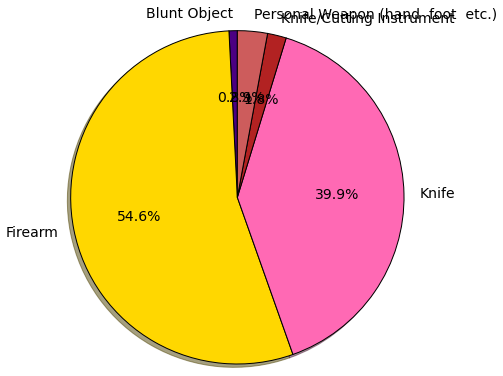

In [307]:
plt.pie(counts, explode=explode, labels=labels, colors=clrs, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

# Part III: Plot of locations

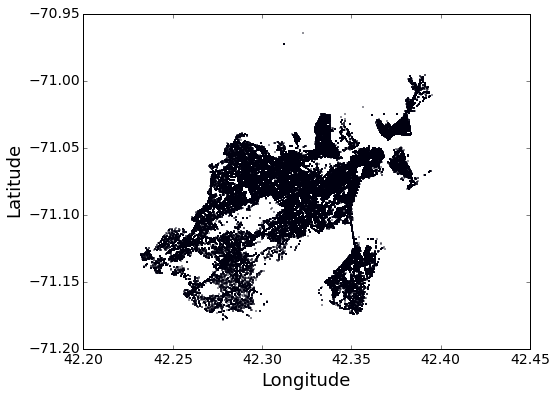

In [337]:
x, y = zip(*df[df.Location != '(0.0, 0.0)']['Location'].map(eval).tolist())
plt.scatter(x, y, s=1, marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')